In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('Testing_set_advance.csv')

In [10]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,24206,35,4640,DX5,65,20.710365,NO,RURAL,Stable,1,0,0,0,1,0,0,2
1,32827,30,3214,dx1,2,24.250219,NO,URBAN,Stable,1,0,0,0,1,0,0,2
2,3694,46,3564,dx6,1,27.139276,NO,URBAN,Stable,1,0,0,0,0,0,0,1
3,7164,44,5176,DX1,29,29.191759,NO,RURAL,Stable,0,0,1,0,1,0,0,2
4,1259,30,1101,DX5,51,20.844146,NO,URBAN,Stable,0,0,0,0,1,0,0,1


In [11]:
data.shape

(9330, 17)

In [12]:
data.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                              int64
B                              int64
C                              int64
D                              int64
E                              int64
F                              int64
Z                              int64
Number_of_prev_cond            int64
dtype: object

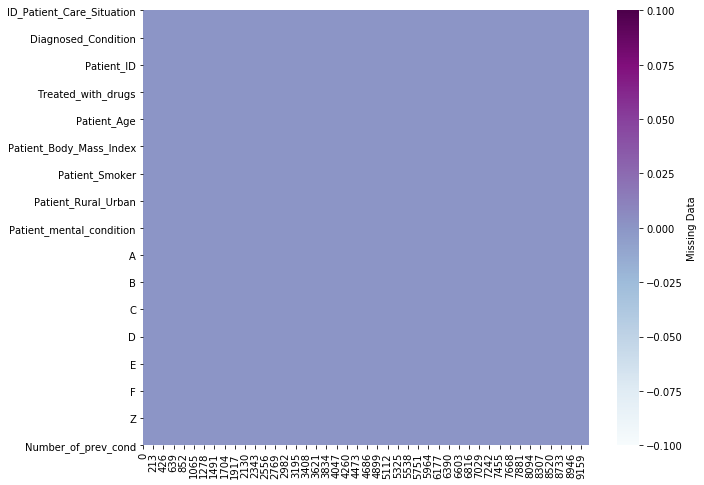

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isna().transpose(),
            cmap="BuPu",
            cbar_kws={'label': 'Missing Data'})
#plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [14]:
data['Treated_with_drugs'].isna().sum()

0

In [19]:
data.insert(3, "Drug_DX1", True) 
data.insert(4, "Drug_DX2", True)
data.insert(5, "Drug_DX3", True)
data.insert(6, "Drug_DX4", True)
data.insert(7, "Drug_DX5", True)
data.insert(8, "Drug_DX6", True)

In [20]:
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Drug_DX1,Drug_DX2,Drug_DX3,Drug_DX4,Drug_DX5,Drug_DX6,Treated_with_drugs,...,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,24206,35,4640,True,True,True,True,True,True,DX5,...,RURAL,Stable,1,0,0,0,1,0,0,2
1,32827,30,3214,True,True,True,True,True,True,dx1,...,URBAN,Stable,1,0,0,0,1,0,0,2
2,3694,46,3564,True,True,True,True,True,True,dx6,...,URBAN,Stable,1,0,0,0,0,0,0,1
3,7164,44,5176,True,True,True,True,True,True,DX1,...,RURAL,Stable,0,0,1,0,1,0,0,2
4,1259,30,1101,True,True,True,True,True,True,DX5,...,URBAN,Stable,0,0,0,0,1,0,0,1


In [21]:
data.Drug_DX1 = data.Treated_with_drugs.apply(lambda x: 1 if 'DX1' in x.split() else 0)
data.Drug_DX2 = data.Treated_with_drugs.apply(lambda x: 1 if 'DX2' in x.split() else 0)
data.Drug_DX3 = data.Treated_with_drugs.apply(lambda x: 1 if 'DX3' in x.split() else 0)
data.Drug_DX4 = data.Treated_with_drugs.apply(lambda x: 1 if 'DX4' in x.split() else 0)
data.Drug_DX5 = data.Treated_with_drugs.apply(lambda x: 1 if 'DX5' in x.split() else 0)
data.Drug_DX6 = data.Treated_with_drugs.apply(lambda x: 1 if 'DX6' in x.split() else 0)

In [22]:
data.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Drug_DX1                       int64
Drug_DX2                       int64
Drug_DX3                       int64
Drug_DX4                       int64
Drug_DX5                       int64
Drug_DX6                       int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                              int64
B                              int64
C                              int64
D                              int64
E                              int64
F                              int64
Z                              int64
Number_of_prev_cond            int64
dtype: object

In [23]:
def smoke_to_numeric(x):
    if x=='NO':
        return 0
    elif x=='YES':
        return 1
    else:
        return 2

In [24]:
data.Patient_Smoker = data.Patient_Smoker.apply(smoke_to_numeric)

In [25]:
def area_to_numeric(x):
    if x=='URBAN':
        return 1
    elif x=='RURAL':
        return 0

In [26]:
data.Patient_Rural_Urban = data.Patient_Rural_Urban.apply(area_to_numeric)

In [27]:
data.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Drug_DX1                       int64
Drug_DX2                       int64
Drug_DX3                       int64
Drug_DX4                       int64
Drug_DX5                       int64
Drug_DX6                       int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                 int64
Patient_Rural_Urban            int64
Patient_mental_condition      object
A                              int64
B                              int64
C                              int64
D                              int64
E                              int64
F                              int64
Z                              int64
Number_of_prev_cond            int64
dtype: object

In [28]:
data['Patient_Body_Mass_Index'] = data['Patient_Body_Mass_Index'].astype(int)

In [29]:
data['Number_of_prev_cond'] = data['Number_of_prev_cond'].astype(int)

In [35]:
data = data.drop(columns=['Patient_mental_condition'])

In [37]:
data = data.drop(columns=['Treated_with_drugs'])

In [38]:
data.dtypes

ID_Patient_Care_Situation    int64
Diagnosed_Condition          int64
Patient_ID                   int64
Drug_DX1                     int64
Drug_DX2                     int64
Drug_DX3                     int64
Drug_DX4                     int64
Drug_DX5                     int64
Drug_DX6                     int64
Patient_Age                  int64
Patient_Body_Mass_Index      int32
Patient_Smoker               int64
Patient_Rural_Urban          int64
A                            int64
B                            int64
C                            int64
D                            int64
E                            int64
F                            int64
Z                            int64
Number_of_prev_cond          int32
dtype: object